## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [210]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline


To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [211]:
x_points = np.linspace(0,20)
y_points = -1*x_points + 2
# print(x_points)
# print(y_points)

x_points = x_points.reshape((-1,1))
y_points = y_points.reshape((-1,1))
# print(x_points)
# print(y_points)

print("shape of x = ",x_points.shape)
print("shape of y = ",y_points.shape)



shape of x =  (50, 1)
shape of y =  (50, 1)


#### Plot your data points. 

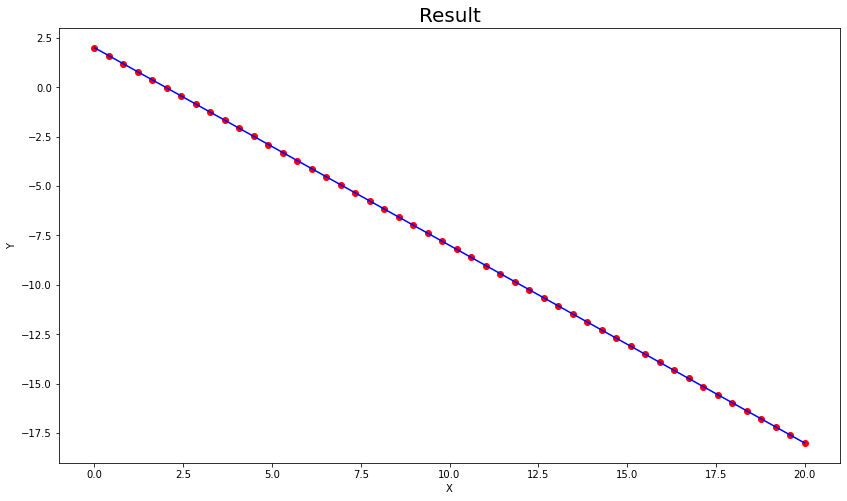

In [212]:
fig = plt.figure(figsize=(14,8))
fig1 =  fig.add_subplot(111)
fig1.scatter(x_points,y_points,c="r")
plt.plot(x_points,y_points,c="b");
plt.title("Result",fontsize=20)
plt.xlabel("X")
plt.ylabel("Y");

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

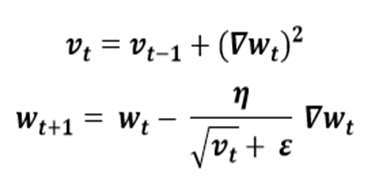

# Solution

## First trial AdaGrad

In [225]:
def AdaGD(x_data,y_data,epochs,batch_size,alpha,epsilon): # General rule but if "mini patch" then batch size = 4 , "stochastic" then batch size = 1 , "batch GD" then batch size = len(x_data)
    m = len(x_data)
#     vt = 0
    vt = np.zeros((x_data.shape[1]+1,1))
    loss = []
    theta_iteration = []
    hypothesis = []
    theta = np.zeros((x_data.shape[1]+1,1)) # theta = 2x1
    b = batch_size
    steps = m//b if (m%b)==0 else (m//b)+1 # integer division to get all steps even the missed step we +1 
    for _ in range(epochs):
        for step in range(steps):
            x_batch = x_data[step*b:(step+1)*b]
            y_batch = y_data[step*b:(step+1)*b]
            x_batch = np.concatenate((np.ones((x_batch.shape[0],1)),x_batch),axis=1) # ones in x batch
            h = x_batch @ theta
            hypothesis.append(h)
            loss.append((1/(2*b))*np.sum(np.square(h-y_batch)))
            vt = vt + np.square((1/b)*(x_batch.T@(h-y_batch))) # x_batch.T 2x4  x (h-y_batch) 4x1 = 2x1
            theta = theta - alpha*(1/(np.sqrt(vt)+epsilon)) * (1/b)*(x_batch.T@(h-y_batch))
            theta_iteration.append(theta)
            if np.linalg.norm((1/b)*(x_batch.T@(h-y_batch)),2) <= 0.001: # Stopping criteria = GRAD <= 0.001
                loss = np.array(loss)
                theta_iteration = np.array(theta_iteration)
                return theta , loss ,theta_iteration,hypothesis
    loss = np.array(loss)
    theta_iteration = np.array(theta_iteration)
    hypothesis = np.array(hypothesis)
    return theta , loss ,theta_iteration,hypothesis

theta =  [[ 1.9074937 ]
 [-0.99296654]]
All predicted Theta_0 and Theta_1 in all iterations =
 [[[-0.2       ]
  [-0.2       ]]

 [[-0.31739351]
  [-0.31976274]]

 [[-0.40005452]
  [-0.40601171]]

 ...

 [[ 1.90687079]
  [-0.99291917]]

 [[ 1.90718277]
  [-0.99294289]]

 [[ 1.9074937 ]
  [-0.99296654]]]
loss =  [4.93469388e+01 2.79220408e+01 1.80843418e+01 1.23855756e+01
 8.78037427e+00 6.39433356e+00 4.77275739e+00 3.65193686e+00
 2.86829555e+00 2.31583701e+00 1.92383307e+00 1.64413270e+00
 1.44349617e+00 1.29875327e+00 1.19364205e+00 1.11669388e+00
 1.05979286e+00 1.01718165e+00 9.84768939e-01 9.59643702e-01
 9.39732792e-01 9.23558783e-01 9.10068244e-01 8.98509746e-01
 8.88347095e-01 8.79197551e-01 8.70787822e-01 8.62922687e-01
 8.55462633e-01 8.48307898e-01 8.41387092e-01 8.34649077e-01
 8.28057172e-01 8.21585019e-01 8.15213631e-01 8.08929287e-01
 8.02722028e-01 7.96584581e-01 7.90511597e-01 7.84499100e-01
 7.78544098e-01 7.72644305e-01 7.66797939e-01 7.61003582e-01
 7.55260078e-01 

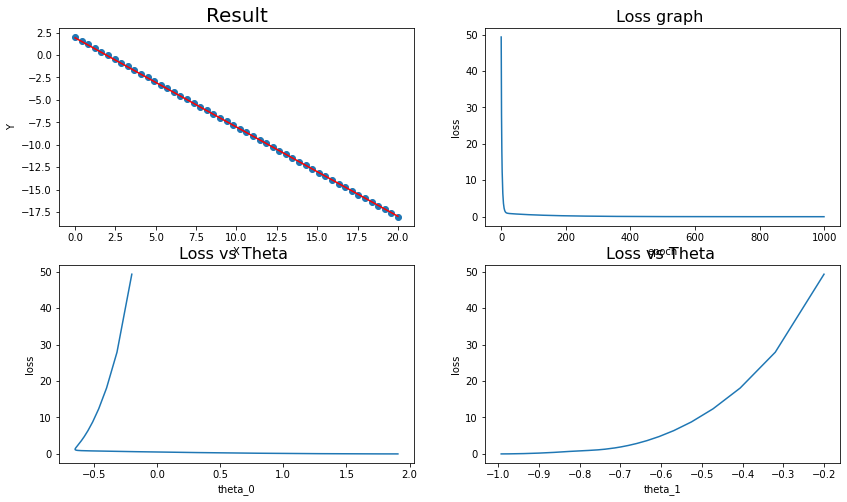

In [226]:
# AdaGrad Gradient decent
theta,loss, theta_iteration,hypothesis = AdaGD(x_points,y_points,batch_size=len(x_points),epochs=1000,alpha=0.2,epsilon=1e-8)
print("theta = ",theta)
print("All predicted Theta_0 and Theta_1 in all iterations =\n",theta_iteration)

print("loss = ",loss)
print("hypothesis =",hypothesis)
# print("theta trials =\n",theta_iteration.shape[0])
# print("theta trials =\n",theta_iteration.shape[1])
# print("theta trials =\n",theta_iteration[0])
# print("theta trials =\n",theta_iteration[1])

# h = []
# for x in x_points:
#     h.append(theta[0] + theta[1]*x)
# print("h =\n",h)

h =  theta[0] +  x_points @ theta[1:]
print("h =\n",h)


fig = plt.figure(figsize=(14,8))

fig1 =  fig.add_subplot(221)
fig1.scatter(x_points,y_points)
plt.plot(x_points,h,'r')
plt.title("Result",fontsize=20)
plt.xlabel("X")
plt.ylabel("Y");

fig2 =  fig.add_subplot(222)
fig2.plot(loss)
plt.title("Loss graph ",fontsize=16);
plt.xlabel("epoch")
plt.ylabel("loss");

fig3 =  fig.add_subplot(223)
fig3.plot(theta_iteration[:,0],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_0")
plt.ylabel("loss");

fig4 =  fig.add_subplot(224)
fig4.plot(theta_iteration[:,1],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_1")
plt.ylabel("loss");

In [227]:
print("r2_score =" ,r2_score(y_points,h) * 100,"%")

r2_score = 99.99363612417727 %


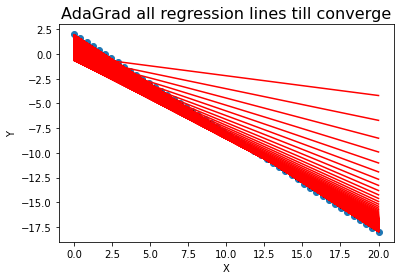

In [228]:
import time

plt.scatter(x_points,y_points)
for i in range(theta_iteration.shape[0]):
    h = theta_iteration[i,0]+x_points*theta_iteration[i,1]
#     print("h = ",h)
    plt.plot(x_points,h,c='r')
#     plt.show()
#     time.sleep(0.05)


plt.title("AdaGrad all regression lines till converge",fontsize=16)
plt.xlabel("X")
plt.ylabel("Y");

## Second trial AdaGrad

theta =  [[-0.038325  ]
 [-0.84463025]]
All predicted Theta_0 and Theta_1 in all iterations =
 [[[-0.05      ]
  [-0.05      ]]

 [[-0.08407515]
  [-0.08418582]]

 [[-0.11123934]
  [-0.11150149]]

 ...

 [[-0.03965075]
  [-0.84452847]]

 [[-0.03898774]
  [-0.84457937]]

 [[-0.038325  ]
  [-0.84463025]]]
loss =  [49.34693878 43.40686225 39.57035738 36.63600328 34.23008336 32.18016179
 30.39019824 28.80031754 27.37025746 26.07142873 24.88267807 23.78784168
 22.77424404 21.83173108 20.95202215 20.12826141 19.35469822 18.6264541
 17.93934916 17.28977051 16.67457087 16.09098929 15.5365884  15.00920418
 14.5069053  14.02795988 13.57080814 13.13403966 12.71637436 12.31664646
 11.93379093 11.56683188 11.21487264 10.87708722 10.55271287 10.24104371
  9.94142502  9.65324837  9.37594727  9.10899333  8.85189288  8.60418395
  8.36543356  8.13523538  7.91320748  7.69899049  7.4922458   7.292654
  7.09991345  6.913739    6.73386079  6.56002322  6.39198394  6.22951296
  6.07239185  5.92041299  5.77337

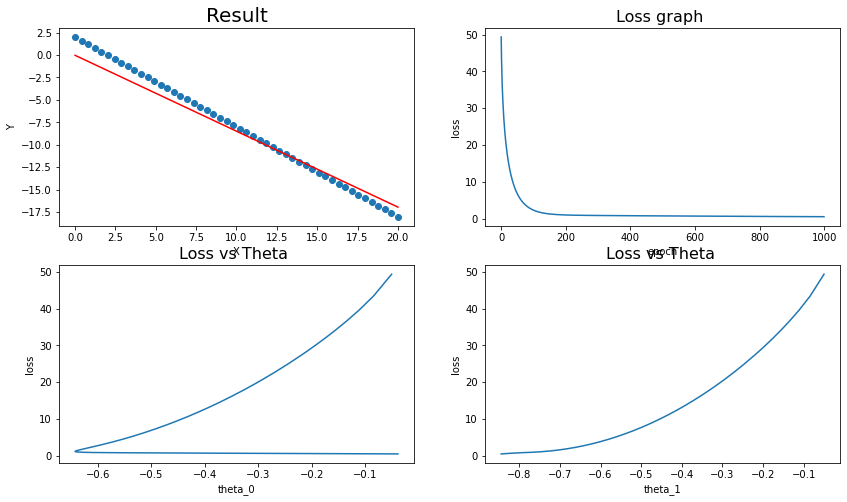

In [229]:
# AdaGrad Gradient decent
theta,loss, theta_iteration,hypothesis = AdaGD(x_points,y_points,batch_size=len(x_points),epochs=1000,alpha=0.05,epsilon=1e-8)
print("theta = ",theta)
print("All predicted Theta_0 and Theta_1 in all iterations =\n",theta_iteration)

print("loss = ",loss)
print("hypothesis =",hypothesis)
# print("theta trials =\n",theta_iteration.shape[0])
# print("theta trials =\n",theta_iteration.shape[1])
# print("theta trials =\n",theta_iteration[0])
# print("theta trials =\n",theta_iteration[1])

# h = []
# for x in x_points:
#     h.append(theta[0] + theta[1]*x)
# print("h =\n",h)

h =  theta[0] +  x_points @ theta[1:]
print("h =\n",h)


fig = plt.figure(figsize=(14,8))

fig1 =  fig.add_subplot(221)
fig1.scatter(x_points,y_points)
plt.plot(x_points,h,'r')
plt.title("Result",fontsize=20)
plt.xlabel("X")
plt.ylabel("Y");

fig2 =  fig.add_subplot(222)
fig2.plot(loss)
plt.title("Loss graph ",fontsize=16);
plt.xlabel("epoch")
plt.ylabel("loss");

fig3 =  fig.add_subplot(223)
fig3.plot(theta_iteration[:,0],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_0")
plt.ylabel("loss");

fig4 =  fig.add_subplot(224)
fig4.plot(theta_iteration[:,1],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_1")
plt.ylabel("loss");

In [230]:
print("r2_score =" ,r2_score(y_points,h) * 100,"%")

r2_score = 96.90906367404757 %


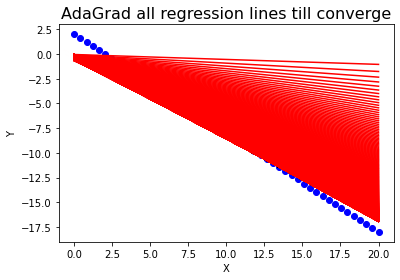

In [231]:
import time

plt.scatter(x_points,y_points,c='b')
for i in range(theta_iteration.shape[0]):
    h = theta_iteration[i,0]+x_points*theta_iteration[i,1]
#     print("h = ",h)
    plt.plot(x_points,h,c='r')
#     plt.show()
#     time.sleep(0.05)
    
plt.title("AdaGrad all regression lines till converge",fontsize=16)
plt.xlabel("X")
plt.ylabel("Y");

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

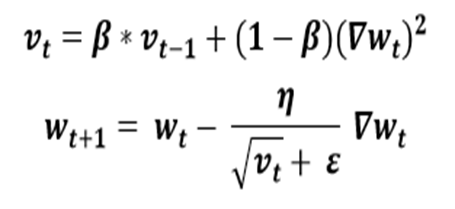

## First trial RMSProp

In [232]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline


shape of x =  (50, 1)
shape of y =  (50, 1)


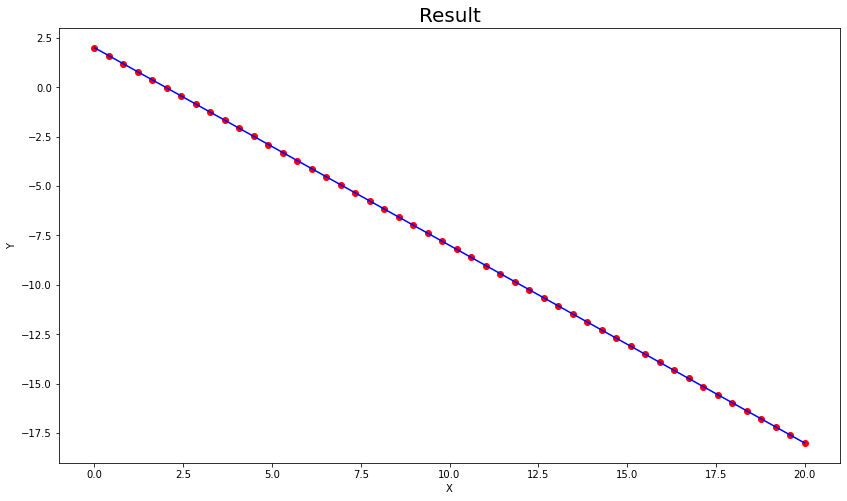

In [233]:
x_points = np.linspace(0,20)
y_points = -1*x_points + 2
# print(x_points)
# print(y_points)

x_points = x_points.reshape((-1,1))
y_points = y_points.reshape((-1,1))
# print(x_points)
# print(y_points)

print("shape of x = ",x_points.shape)
print("shape of y = ",y_points.shape)

fig = plt.figure(figsize=(14,8))
fig1 =  fig.add_subplot(111)
fig1.scatter(x_points,y_points,c="r")
plt.plot(x_points,y_points,c="b");
plt.title("Result",fontsize=20)
plt.xlabel("X")
plt.ylabel("Y");

In [234]:
def RMSPropGD(x_data,y_data,epochs,batch_size,alpha,epsilon,beta): # General rule but if "mini patch" then batch size = 4 , "stochastic" then batch size = 1 , "batch GD" then batch size = 12
    m = len(x_data)
#     vt = 0
    vt = np.zeros((x_data.shape[1]+1,1))
#     y_data = y_data.reshape((-1,1))
    hypothesis = []
    loss = []
    theta_iteration = []
#     theta = np.random.random(size=(x_data.shape[1]+1,1)) # theta = 4x1
    theta = np.zeros((x_data.shape[1]+1,1)) # theta = 4x1
    b = batch_size
    steps = m//b if (m%b)==0 else (m//b)+1 # integer division to get all steps even the missed step we +1 
    for _ in range(epochs):
        for step in range(steps):
            x_batch = x_data[step*b:(step+1)*b]
            y_batch = y_data[step*b:(step+1)*b]
            x_batch = np.concatenate((np.ones((x_batch.shape[0],1)),x_batch),axis=1) # ones in x batch
            h = x_batch @ theta
            hypothesis.append(h)
            loss.append((1/(2*b))*np.sum(np.square(h-y_batch)))
            vt = beta * vt + (1-beta) * np.square((1/b)*(x_batch.T@(h-y_batch))) # gamma 0 till 1 > 0 then no momentum  #// x_batch.T 2x4  x (h-y_batch) 4x1 = 2x1
            theta = theta - alpha*(1/(np.sqrt(vt)+epsilon)) * (1/b)*(x_batch.T@(h-y_batch))
            theta_iteration.append(theta)
            if np.linalg.norm((1/b)*(x_batch.T@(h-y_batch)),2) <= 0.001: # Stopping criteria = GRAD <= 0.001
                loss = np.array(loss)
                theta_iteration = np.array(theta_iteration)
                return theta , loss ,theta_iteration,hypothesis
    loss = np.array(loss)
    theta_iteration = np.array(theta_iteration)
    hypothesis = np.array(hypothesis)
    return theta , loss ,theta_iteration,hypothesis

theta =  [[ 2.00433921]
 [-0.99494977]]
All predicted Theta_0 and Theta_1 in all iterations =
 [[[-0.01054093]
  [-0.01054093]]

 [[-0.02057779]
  [-0.02057893]]

 [[-0.03056728]
  [-0.03056973]]

 ...

 [[ 2.00432857]
  [-0.99494896]]

 [[ 1.99433394]
  [-1.00494936]]

 [[ 2.00433921]
  [-0.99494977]]]
loss =  [4.93469388e+01 4.80622814e+01 4.68550065e+01 4.56689870e+01
 4.44990804e+01 4.33447767e+01 4.22060245e+01 4.10828185e+01
 3.99751579e+01 3.88830421e+01 3.78064710e+01 3.67454440e+01
 3.56999609e+01 3.46700212e+01 3.36556246e+01 3.26567707e+01
 3.16734589e+01 3.07056890e+01 2.97534605e+01 2.88167728e+01
 2.78956256e+01 2.69900182e+01 2.60999503e+01 2.52254213e+01
 2.43664306e+01 2.35229777e+01 2.26950620e+01 2.18826829e+01
 2.10858396e+01 2.03045317e+01 1.95387584e+01 1.87885189e+01
 1.80538126e+01 1.73346387e+01 1.66309963e+01 1.59428846e+01
 1.52703027e+01 1.46132498e+01 1.39717247e+01 1.33457266e+01
 1.27352543e+01 1.21403068e+01 1.15608827e+01 1.09969810e+01
 1.04486002e+01 

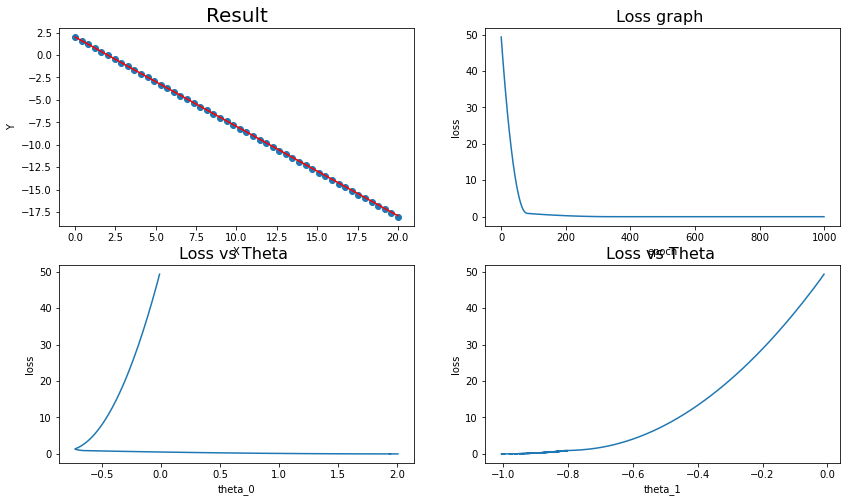

In [235]:
# RMSProp Gradient decent
theta,loss, theta_iteration,hypothesis = RMSPropGD(x_points,y_points,batch_size=len(x_points)
                                        ,epochs=1000,alpha=0.01,epsilon=1e-8,beta=0.1)
print("theta = ",theta)
print("All predicted Theta_0 and Theta_1 in all iterations =\n",theta_iteration)

print("loss = ",loss)
print("hypothesis =",hypothesis)
# print("theta trials =\n",theta_iteration.shape[0])
# print("theta trials =\n",theta_iteration.shape[1])
# print("theta trials =\n",theta_iteration[0])
# print("theta trials =\n",theta_iteration[1])


# h = []
# for x in x_points:
#     h.append(theta[0] + theta[1]*x)
# print("h =\n",h)

h =  theta[0] +  x_points @ theta[1:]
print("h =\n",h)


fig = plt.figure(figsize=(14,8))

fig1 =  fig.add_subplot(221)
fig1.scatter(x_points,y_points)
plt.plot(x_points,h,'r')
plt.title("Result",fontsize=20)
plt.xlabel("X")
plt.ylabel("Y");

fig2 =  fig.add_subplot(222)
fig2.plot(loss)
plt.title("Loss graph ",fontsize=16);
plt.xlabel("epoch")
plt.ylabel("loss");

fig3 =  fig.add_subplot(223)
fig3.plot(theta_iteration[:,0],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_0")
plt.ylabel("loss");

fig4 =  fig.add_subplot(224)
fig4.plot(theta_iteration[:,1],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_1")
plt.ylabel("loss");

In [236]:
print("r2_score =" ,r2_score(y_points,h) * 100,"%")

r2_score = 99.98878056262977 %


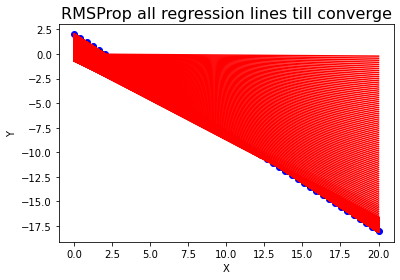

In [237]:
# import time

plt.scatter(x_points,y_points,c='b')
for i in range(theta_iteration.shape[0]):
    h = theta_iteration[i,0]+x_points*theta_iteration[i,1]
#     print("h = ",h)
    plt.plot(x_points,h,c='r')
#     plt.show()
#     time.sleep(0.05)

plt.title("RMSProp all regression lines till converge",fontsize=16)
plt.xlabel("X")
plt.ylabel("Y");

## Second trial RMSProp

theta =  [[ 1.58339775]
 [-0.91457252]]
All predicted Theta_0 and Theta_1 in all iterations =
 [[[-0.1118034 ]
  [-0.1118034 ]]

 [[-0.21065308]
  [-0.21097086]]

 [[-0.30639934]
  [-0.30725817]]

 [[-0.40048919]
  [-0.40218513]]

 [[-0.49266796]
  [-0.49572665]]

 [[-0.58163856]
  [-0.58720693]]

 [[-0.66364   ]
  [-0.67497936]]

 [[-0.72269924]
  [-0.75444112]]

 [[-0.66973709]
  [-0.80773158]]

 [[-0.56380598]
  [-0.79160196]]

 [[-0.47371351]
  [-0.86988252]]

 [[-0.36468653]
  [-0.76058602]]

 [[-0.37080123]
  [-0.86497419]]

 [[-0.26198684]
  [-0.7753677 ]]

 [[-0.25825436]
  [-0.87905274]]

 [[-0.14862364]
  [-0.78256289]]

 [[-0.15463313]
  [-0.88572006]]

 [[-0.04525428]
  [-0.79046338]]

 [[-0.05729676]
  [-0.89370349]]

 [[ 0.05213653]
  [-0.79790153]]

 [[ 0.03437038]
  [-0.90092124]]

 [[ 0.14376293]
  [-0.80485857]]

 [[ 0.12040776]
  [-0.90774036]]

 [[ 0.22975996]
  [-0.81141489]]

 [[ 0.20120055]
  [-0.91414687]]

 [[ 0.31050026]
  [-0.81757127]]

 [[ 0.27706828]
  [-0

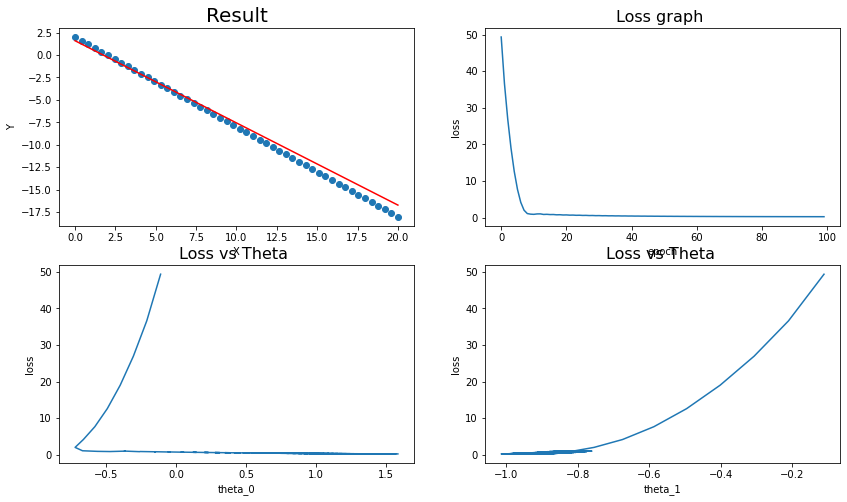

In [238]:
# RMSProp Gradient decent
theta,loss, theta_iteration,hypothesis = RMSPropGD(x_points,y_points,batch_size=len(x_points)
                                        ,epochs=100,alpha=0.1,epsilon=1e-8,beta=0.2)
print("theta = ",theta)
print("All predicted Theta_0 and Theta_1 in all iterations =\n",theta_iteration)

print("loss = ",loss)
print("hypothesis =",hypothesis)
# print("theta trials =\n",theta_iteration.shape[0])
# print("theta trials =\n",theta_iteration.shape[1])
# print("theta trials =\n",theta_iteration[0])
# print("theta trials =\n",theta_iteration[1])


# h = []
# for x in x_points:
#     h.append(theta[0] + theta[1]*x)
# print("h =\n",h)

h =  theta[0] +  x_points @ theta[1:]
print("h =\n",h)


fig = plt.figure(figsize=(14,8))

fig1 =  fig.add_subplot(221)
fig1.scatter(x_points,y_points)
plt.plot(x_points,h,'r')
plt.title("Result",fontsize=20)
plt.xlabel("X")
plt.ylabel("Y");

fig2 =  fig.add_subplot(222)
fig2.plot(loss)
plt.title("Loss graph ",fontsize=16);
plt.xlabel("epoch")
plt.ylabel("loss");

fig3 =  fig.add_subplot(223)
fig3.plot(theta_iteration[:,0],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_0")
plt.ylabel("loss");

fig4 =  fig.add_subplot(224)
fig4.plot(theta_iteration[:,1],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_1")
plt.ylabel("loss");

In [239]:
print("r2_score =" ,r2_score(y_points,h) * 100,"%")

r2_score = 98.7180788670685 %


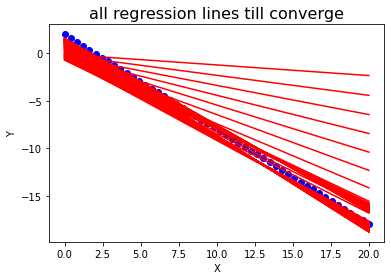

In [240]:
# import time

plt.scatter(x_points,y_points,c='b')
for i in range(theta_iteration.shape[0]):
    h = theta_iteration[i,0]+x_points*theta_iteration[i,1]
#     print("h = ",h)
    plt.plot(x_points,h,c='r')
#     plt.show()
#     time.sleep(0.05)
    
plt.title("all regression lines till converge",fontsize=16)
plt.xlabel("X")
plt.ylabel("Y");

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

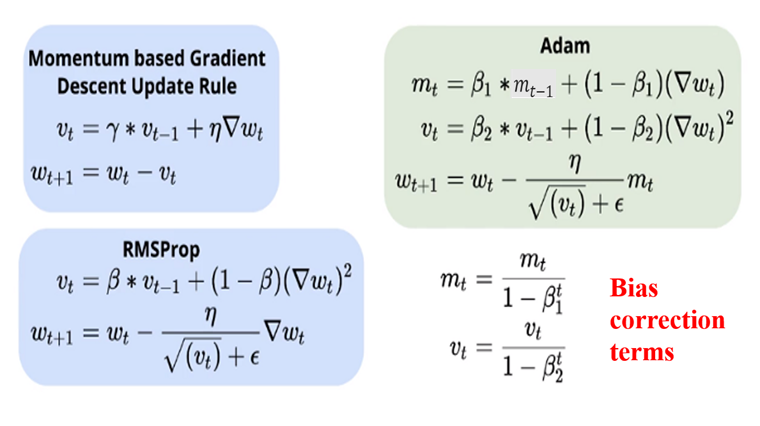

## First Trial Adam

In [241]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline


shape of x =  (50, 1)
shape of y =  (50, 1)


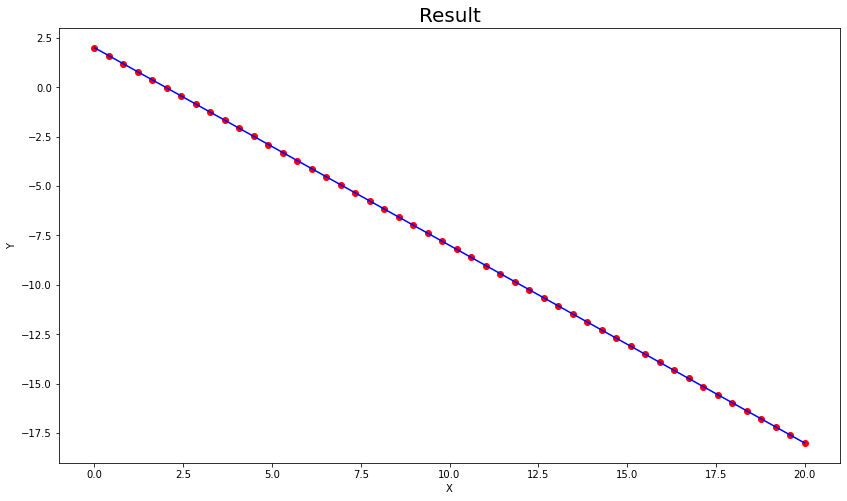

In [242]:
x_points = np.linspace(0,20)
y_points = -1*x_points + 2
# print(x_points)
# print(y_points)

x_points = x_points.reshape((-1,1))
y_points = y_points.reshape((-1,1))
# print(x_points)
# print(y_points)

print("shape of x = ",x_points.shape)
print("shape of y = ",y_points.shape)

fig = plt.figure(figsize=(14,8))
fig1 =  fig.add_subplot(111)
fig1.scatter(x_points,y_points,c="r")
plt.plot(x_points,y_points,c="b");
plt.title("Result",fontsize=20)
plt.xlabel("X")
plt.ylabel("Y");

In [243]:
def AdamGD(x_data,y_data,epochs,batch_size,alpha,epsilon,beta_1,beta_2): # General rule but if "mini patch" then batch size = 4 , "stochastic" then batch size = 1 , "batch GD" then batch size = 12
    m = len(x_data)
    
#     vt = 0
    vt = np.zeros((x_data.shape[1]+1,1))
#     mt = 0
    mt = np.zeros((x_data.shape[1]+1,1))
    
    t = 1
    hypothesis = []
    loss = []
    theta_iteration = []
    theta = np.random.random(size=(x_data.shape[1]+1,1)) # theta = 4x1
#     theta = np.zeros((x_data.shape[1]+1,1)) # theta = 4x1
    
    b = batch_size
    steps = m//b if (m%b)==0 else (m//b)+1 # integer division to get all steps even the missed step we +1 
    for _ in range(epochs):
        for step in range(steps):
            x_batch = x_data[step*b:(step+1)*b]
            y_batch = y_data[step*b:(step+1)*b]
            x_batch = np.concatenate((np.ones((x_batch.shape[0],1)),x_batch),axis=1) # ones in x batch
            h = x_batch @ theta
            hypothesis.append(h)

            loss.append((1/(2*b))*np.sum(np.square(h-y_batch)))
            
            mt = beta_1 * mt + (1 - beta_1) * (1/b)*(x_batch.T@(h-y_batch))
            vt = beta_2 * vt + (1 - beta_2) * np.square((1/b)*(x_batch.T@(h-y_batch)))
            mt_bias = mt /(1-beta_1**t)
            vt_bias = vt /(1-beta_2**t)
            theta = theta - alpha*(1/(np.sqrt(vt_bias)+epsilon)) * mt_bias
            t += 1
            theta_iteration.append(theta)
            if np.linalg.norm((1/b)*(x_batch.T@(h-y_batch)),2) <= 0.001: # Stopping criteria = GRAD <= 0.001
                loss = np.array(loss)
                theta_iteration = np.array(theta_iteration)
                return theta , loss ,theta_iteration,hypothesis
    loss = np.array(loss)
    theta_iteration = np.array(theta_iteration)
    hypothesis = np.array(hypothesis)
    return theta , loss ,theta_iteration,hypothesis

theta =  [[ 0.84336089]
 [-0.91193213]]
All predicted Theta_0 and Theta_1 in all iterations =
 [[[ 0.74269243]
  [ 0.3132677 ]]

 [[ 0.73269494]
  [ 0.30327008]]

 [[ 0.72270165]
  [ 0.29327645]]

 ...

 [[ 0.84046483]
  [-0.91171156]]

 [[ 0.8419132 ]
  [-0.91182187]]

 [[ 0.84336089]
  [-0.91193213]]]
loss =  [102.19967848 100.42997967  98.67626761  96.93881083  95.21786994
  93.51369693  91.82653446  90.15661524  88.50416146  86.86938424
  85.25248316  83.65364581  82.07304743  80.51085063  78.9672051
  77.44224745  75.93610107  74.44887604  72.98066915  71.53156388
  70.10163055  68.69092638  67.29949573  65.92737027  64.57456924
  63.24109977  61.92695712  60.63212511  59.35657639  58.10027288
  56.86316613  55.64519775  54.44629979  53.26639515  52.10539806
  50.96321442  49.83974226  48.73487216  47.64848763  46.58046551
  45.53067639  44.49898496  43.48525039  42.48932669  41.51106308
  40.55030428  39.60689086  38.68065955  37.77144353  36.87907272
  36.00337405  35.14417169  

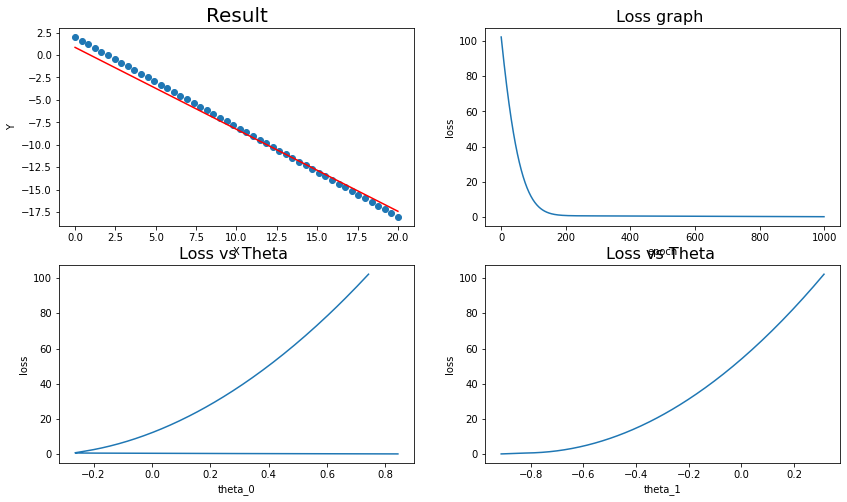

In [244]:
# Adam Gradient decent
theta,loss, theta_iteration,hypothesis = AdamGD(x_points,y_points,batch_size=len(x_points)
                                        ,epochs=1000,alpha=0.01,epsilon=1e-8,beta_1=0.9,beta_2=0.999)
print("theta = ",theta)
print("All predicted Theta_0 and Theta_1 in all iterations =\n",theta_iteration)

print("loss = ",loss)
print("hypothesis =",hypothesis)
# print("theta trials =\n",theta_iteration.shape[0])
# print("theta trials =\n",theta_iteration.shape[1])
# print("theta trials =\n",theta_iteration[0])
# print("theta trials =\n",theta_iteration[1])


# h = []
# for x in x_points:
#     h.append(theta[0] + theta[1]*x)
# print("h =\n",h)

h =  theta[0] +  x_points @ theta[1:]
print("h =\n",h)


fig = plt.figure(figsize=(14,8))

fig1 =  fig.add_subplot(221)
fig1.scatter(x_points,y_points)
plt.plot(x_points,h,'r')
plt.title("Result",fontsize=20)
plt.xlabel("X")
plt.ylabel("Y");

fig2 =  fig.add_subplot(222)
fig2.plot(loss)
plt.title("Loss graph ",fontsize=16);
plt.xlabel("epoch")
plt.ylabel("loss");

fig3 =  fig.add_subplot(223)
fig3.plot(theta_iteration[:,0],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_0")
plt.ylabel("loss");

fig4 =  fig.add_subplot(224)
fig4.plot(theta_iteration[:,1],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_1")
plt.ylabel("loss");

In [245]:
print("r2_score =" ,r2_score(y_points,h) * 100,"%")

r2_score = 99.0049018979663 %


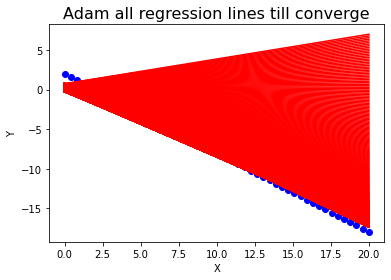

In [246]:
# import time

plt.scatter(x_points,y_points,c='b')
for i in range(theta_iteration.shape[0]):
    h = theta_iteration[i,0]+x_points*theta_iteration[i,1]
#     print("h = ",h)
    plt.plot(x_points,h,c='r')
#     plt.show()
#     time.sleep(0.05)
    


plt.title("Adam all regression lines till converge",fontsize=16)
plt.xlabel("X")
plt.ylabel("Y");

## Second Trial Adam

theta =  [[ 1.99729886]
 [-0.99979466]]
All predicted Theta_0 and Theta_1 in all iterations =
 [[[ 1.10507244e-03]
  [ 5.14739554e-01]]

 [[-9.86233654e-02]
  [ 4.14991009e-01]]

 [[-1.97862418e-01]
  [ 3.15693193e-01]]

 [[-2.96362286e-01]
  [ 2.17072457e-01]]

 [[-3.93837512e-01]
  [ 1.19384945e-01]]

 [[-4.89963389e-01]
  [ 2.29191636e-02]]

 [[-5.84372747e-01]
  [-7.20018419e-02]]

 [[-6.76653575e-01]
  [-1.65019023e-01]]

 [[-7.66348062e-01]
  [-2.55737020e-01]]

 [[-8.52953811e-01]
  [-3.43725513e-01]]

 [[-9.35928075e-01]
  [-4.28522840e-01]]

 [[-1.01469589e+00]
  [-5.09642419e-01]]

 [[-1.08866279e+00]
  [-5.86582476e-01]]

 [[-1.15723242e+00]
  [-6.58839236e-01]]

 [[-1.21982865e+00]
  [-7.25923387e-01]]

 [[-1.27592094e+00]
  [-7.87379042e-01]]

 [[-1.32505082e+00]
  [-8.42803854e-01]]

 [[-1.36685661e+00]
  [-8.91868506e-01]]

 [[-1.40109356e+00]
  [-9.34333588e-01]]

 [[-1.42764677e+00]
  [-9.70062066e-01]]

 [[-1.44653566e+00]
  [-9.99026117e-01]]

 [[-1.45791001e+00]
  [

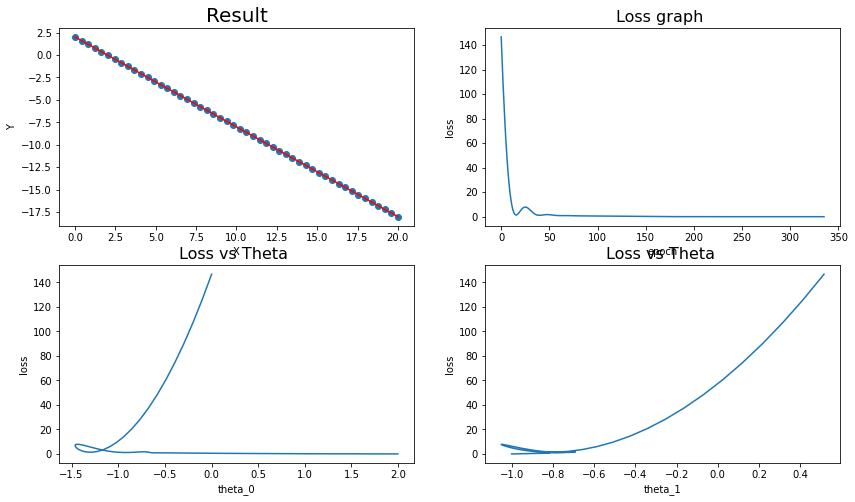

In [247]:
# Adam Gradient decent
theta,loss, theta_iteration,hypothesis = AdamGD(x_points,y_points,batch_size=len(x_points)
                                        ,epochs=1000,alpha=0.1,epsilon=1e-8,beta_1=0.9,beta_2=0.99)
print("theta = ",theta)
print("All predicted Theta_0 and Theta_1 in all iterations =\n",theta_iteration)

print("loss = ",loss)
print("hypothesis =",hypothesis)
# print("theta trials =\n",theta_iteration.shape[0])
# print("theta trials =\n",theta_iteration.shape[1])
# print("theta trials =\n",theta_iteration[0])
# print("theta trials =\n",theta_iteration[1])


# h = []
# for x in x_points:
#     h.append(theta[0] + theta[1]*x)
# print("h =\n",h)

h =  theta[0] +  x_points @ theta[1:]
print("h =\n",h)


fig = plt.figure(figsize=(14,8))

fig1 =  fig.add_subplot(221)
fig1.scatter(x_points,y_points)
plt.plot(x_points,h,'r')
plt.title("Result",fontsize=20)
plt.xlabel("X")
plt.ylabel("Y");

fig2 =  fig.add_subplot(222)
fig2.plot(loss)
plt.title("Loss graph ",fontsize=16);
plt.xlabel("epoch")
plt.ylabel("loss");

fig3 =  fig.add_subplot(223)
fig3.plot(theta_iteration[:,0],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_0")
plt.ylabel("loss");

fig4 =  fig.add_subplot(224)
fig4.plot(theta_iteration[:,1],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_1")
plt.ylabel("loss");

In [248]:
print("r2_score =" ,r2_score(y_points,h) * 100,"%")

r2_score = 99.99999457419308 %


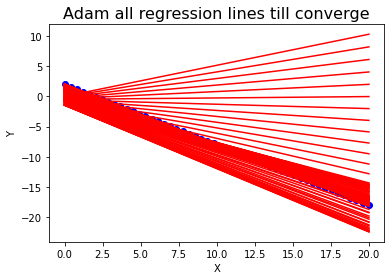

In [249]:
# import time

plt.scatter(x_points,y_points,c='b')
for i in range(theta_iteration.shape[0]):
    h = theta_iteration[i,0]+x_points*theta_iteration[i,1]
#     print("h = ",h)
    plt.plot(x_points,h,c='r')
#     plt.show()
#     time.sleep(0.05)


plt.title("Adam all regression lines till converge",fontsize=16)
plt.xlabel("X")
plt.ylabel("Y");

# Comparision

## 1- AdaGrad

r2_score = 99.99363612417727 %


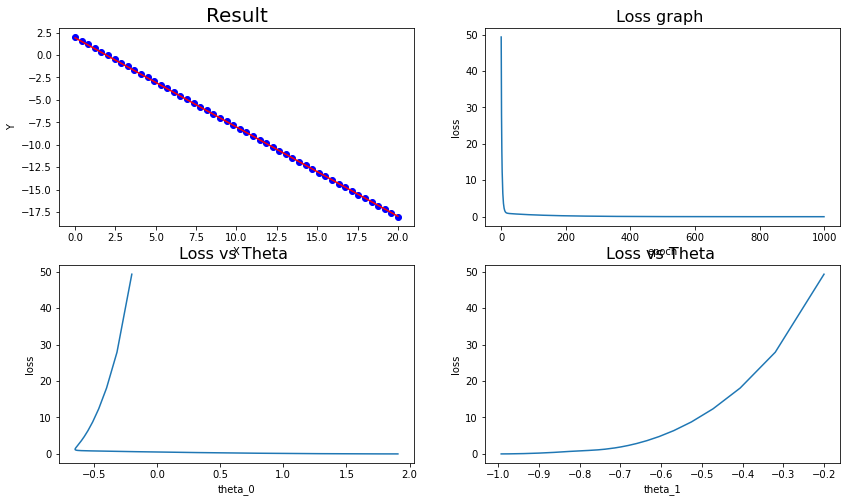

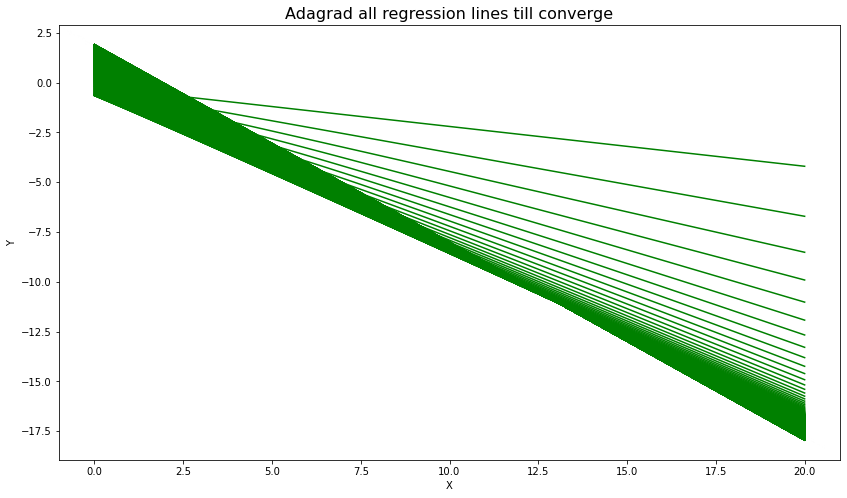

In [250]:
# AdaGrad
theta,loss, theta_iteration,hypothesis = AdaGD(x_points,y_points,batch_size=len(x_points),epochs=1000,alpha=0.2,epsilon=1e-8)

h =  theta[0] +  x_points @ theta[1:]
# print("h =\n",h)

fig = plt.figure(figsize=(14,8))

fig1 =  fig.add_subplot(221)
fig1.scatter(x_points,y_points,c='b')
plt.plot(x_points,h,'r')
plt.title("Result",fontsize=20)
plt.xlabel("X")
plt.ylabel("Y");

fig2 =  fig.add_subplot(222)
fig2.plot(loss)
plt.title("Loss graph ",fontsize=16);
plt.xlabel("epoch")
plt.ylabel("loss");

fig3 =  fig.add_subplot(223)
fig3.plot(theta_iteration[:,0],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_0")
plt.ylabel("loss");

fig4 =  fig.add_subplot(224)
fig4.plot(theta_iteration[:,1],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_1")
plt.ylabel("loss");


fig_iter = plt.figure(figsize=(14,8))
fig_iter1 =  fig_iter.add_subplot(111)
for i in range(theta_iteration.shape[0]):
    h = theta_iteration[i,0]+x_points*theta_iteration[i,1]
#     print("h = ",h)
    fig_iter1.plot(x_points,h,c='g')
#     plt.show()
#     time.sleep(0.05)
plt.title("Adagrad all regression lines till converge",fontsize=16)
plt.xlabel("X")
plt.ylabel("Y");

print("r2_score =" ,r2_score(y_points,h) * 100,"%")

## 2- RMSProp

r2_score = 95.51235256481579 %


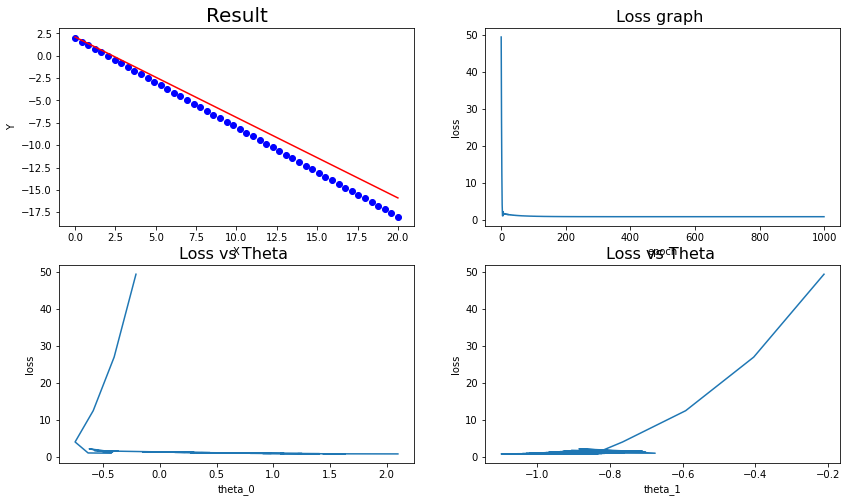

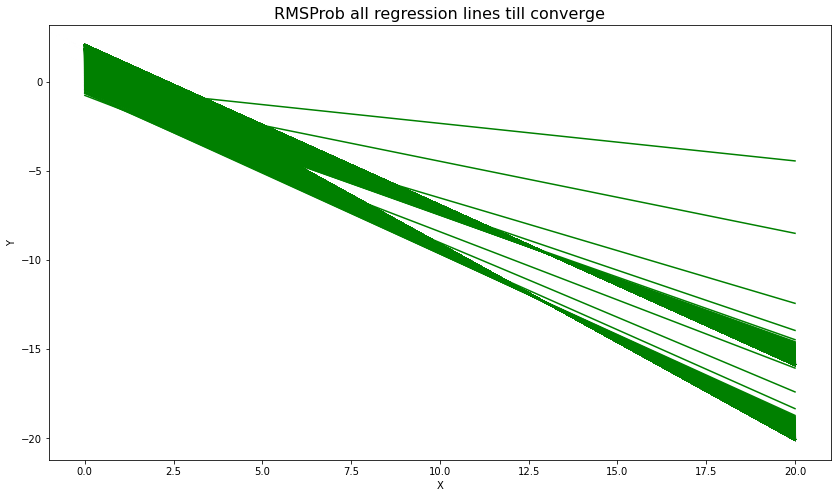

In [251]:
# RMSProp Gradient decent
theta,loss, theta_iteration,hypothesis = RMSPropGD(x_points,y_points,batch_size=len(x_points)
                                        ,epochs=1000,alpha=0.2,epsilon=1e-8,beta=0.1)

h =  theta[0] +  x_points @ theta[1:]
# print("h =\n",h)

fig = plt.figure(figsize=(14,8))

fig1 =  fig.add_subplot(221)
fig1.scatter(x_points,y_points,c='b')
plt.plot(x_points,h,'r')
plt.title("Result",fontsize=20)
plt.xlabel("X")
plt.ylabel("Y");

fig2 =  fig.add_subplot(222)
fig2.plot(loss)
plt.title("Loss graph ",fontsize=16);
plt.xlabel("epoch")
plt.ylabel("loss");

fig3 =  fig.add_subplot(223)
fig3.plot(theta_iteration[:,0],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_0")
plt.ylabel("loss");

fig4 =  fig.add_subplot(224)
fig4.plot(theta_iteration[:,1],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_1")
plt.ylabel("loss");

fig_iter = plt.figure(figsize=(14,8))
fig_iter1 =  fig_iter.add_subplot(111)
for i in range(theta_iteration.shape[0]):
    h = theta_iteration[i,0]+x_points*theta_iteration[i,1]
#     print("h = ",h)
    fig_iter1.plot(x_points,h,c='g')
#     plt.show()
#     time.sleep(0.05)
plt.title("RMSProb all regression lines till converge",fontsize=16)
plt.xlabel("X")
plt.ylabel("Y");

print("r2_score =" ,r2_score(y_points,h) * 100,"%")

## 3- Adam

r2_score = 99.9999985512241 %


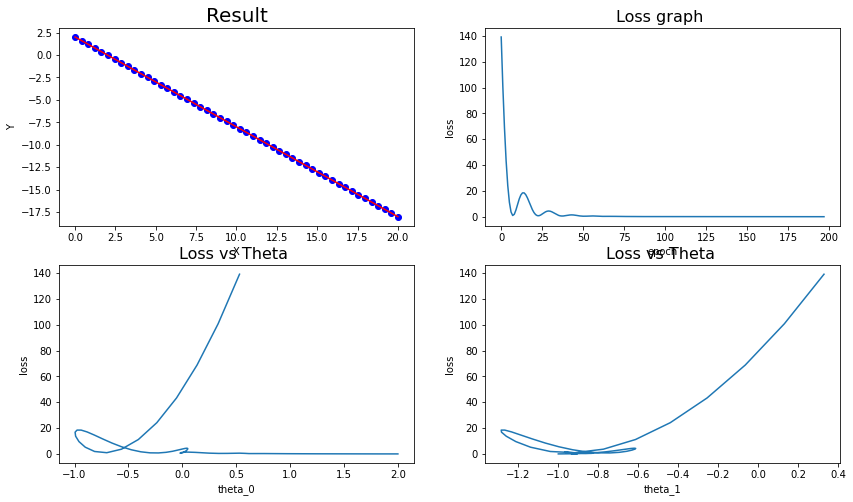

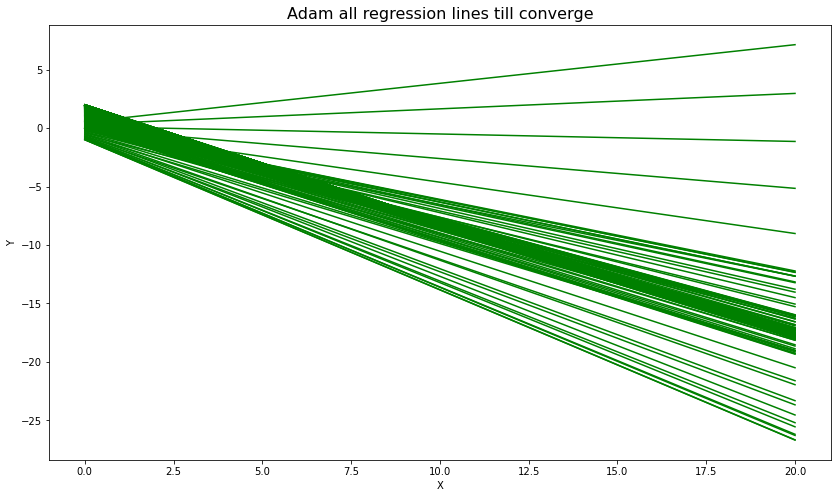

In [252]:
# Adam
theta,loss, theta_iteration,hypothesis = AdamGD(x_points,y_points,batch_size=len(x_points)
                                        ,epochs=1000,alpha=0.2,epsilon=1e-8,beta_1=0.9,beta_2=0.99)

h =  theta[0] +  x_points @ theta[1:]
# print("h =\n",h)

fig = plt.figure(figsize=(14,8))

fig1 =  fig.add_subplot(221)
fig1.scatter(x_points,y_points,c='b')
plt.plot(x_points,h,'r')
plt.title("Result",fontsize=20)
plt.xlabel("X")
plt.ylabel("Y");

fig2 =  fig.add_subplot(222)
fig2.plot(loss)
plt.title("Loss graph ",fontsize=16);
plt.xlabel("epoch")
plt.ylabel("loss");

fig3 =  fig.add_subplot(223)
fig3.plot(theta_iteration[:,0],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_0")
plt.ylabel("loss");

fig4 =  fig.add_subplot(224)
fig4.plot(theta_iteration[:,1],loss)
plt.title("Loss vs Theta ",fontsize=16);
plt.xlabel("theta_1")
plt.ylabel("loss");

fig_iter = plt.figure(figsize=(14,8))
fig_iter1 =  fig_iter.add_subplot(111)
for i in range(theta_iteration.shape[0]):
    h = theta_iteration[i,0]+x_points*theta_iteration[i,1]
#     print("h = ",h)
    fig_iter1.plot(x_points,h,c='g')
#     plt.show()
#     time.sleep(0.05)
plt.title("Adam all regression lines till converge",fontsize=16)
plt.xlabel("X")
plt.ylabel("Y");

print("r2_score =" ,r2_score(y_points,h) * 100,"%")

# Thanks Dr.Hatem and Eng.Kareem for all your efforts

## Congratulations 
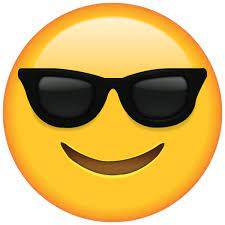